In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

## Гамильтониан: 
$H=\omega_q(a^\dagger a+\frac{1}{2})+ \frac{\alpha}{2} a^\dagger a^\dagger a a -{\Omega}cos(w_d t)(a+a^\dagger)$

## Настройка параметров задачи:


In [2]:
wq = 6.5  * 2 * np.pi  # частота кубита
Omega = 0.1  * 2 * np.pi  # сила связи
alpha=0.01  * 2 * np.pi # ангармонизм
wd=6.5  * 2 * np.pi # частота сигнала
tlist = np.linspace(0,30,300)

## Задание начального состояния, гамильтониана, операторов:

In [12]:
#начальное состояние
psi0 = basis(3,2)
# гамильтониан
a  = destroy(3)
sx = sigmax()
sy = sigmay()
sz = sigmaz()

one = basis(3,0)
two = basis(3,1)
three = basis(3,2)

sig11 = one * one.dag()
sig22 = two * two.dag()
sig33 = three * three.dag()

H0 = wq*(a*a.dag()+1/2)+alpha/2*a.dag()*a.dag()*a*a
H1 = -Omega *(a+a.dag())
H = [H0, [H1, 'cos(wd*t)']]
H_args = {'wd': wd}

print(wq*(a*a.dag()+1/2)+alpha/2*a.dag()*a.dag()*a*a-Omega *(a+a.dag())*np.cos(np.pi/8))


Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[ 61.26105675  -0.58049063   0.        ]
 [ -0.58049063 102.10176124  -0.82093772]
 [  0.          -0.82093772  20.4831841 ]]


## Решение:

In [4]:
output = mesolve(H, psi0, tlist,{},[sig11, sig22, sig33],H_args)

##  Визуализация:

Text(0, 0.5, 'Населенности уровней')

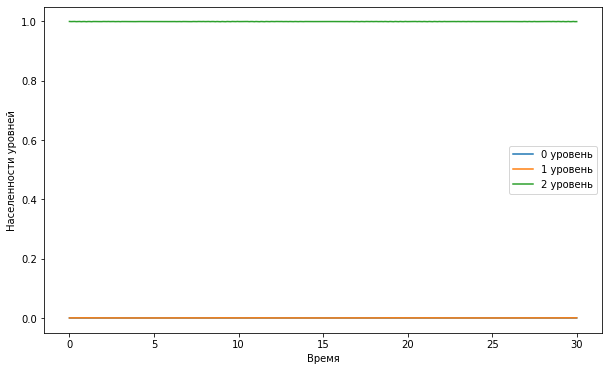

In [5]:
p_0 = output.expect[0]
p_1 = output.expect[1]
p_2 = output.expect[2]
fig, axes = plt.subplots(1, 1, figsize=(10,6))

axes.plot(tlist, p_0, label="0 уровень")
axes.plot(tlist, p_1, label="1 уровень")
axes.plot(tlist, p_2, label="2 уровень")

axes.legend(loc=0)
axes.set_xlabel('Время')
axes.set_ylabel('Населенности уровней')